# Exploratory Data Analysis - HR Attrition Prediction

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set style agar visual lebih rapi
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [4]:
# load data

df = pd.read_csv(r"C:\Mini_H\belajar\hr-attrition-prediction\data\raw\WA_Fn-UseC_-HR-Employee-Attrition.csv")

print("Ukuran dataset : ", df.shape)
df.head()

Ukuran dataset :  (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# informasi dataset

print("\n Kolom info :")
df.info()

print("\n Statistik Umum :")
print(df.describe())


 Kolom info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [7]:
# cek data yang hilang dan duplikat

print("\n Missing value")
print(df.isnull().sum().sort_values(ascending=True).head(10))

print("\n Jumlah data duplikat : ", df.duplicated().sum())


 Missing value
Age                 0
Attrition           0
BusinessTravel      0
DailyRate           0
Department          0
DistanceFromHome    0
Education           0
EducationField      0
EmployeeCount       0
EmployeeNumber      0
dtype: int64

 Jumlah data duplikat :  0


In [10]:
# cek kolom dengan nilai konstan

constan_col = [c for c in df.columns if df[c].nunique() ==  1]
print("\n konstan columns bisa dihapus nanti : ", constan_col)


 konstan columns bisa dihapus nanti :  ['EmployeeCount', 'Over18', 'StandardHours']


C:\Users\Mugis\AppData\Local\Temp\ipykernel_14784\3142414821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


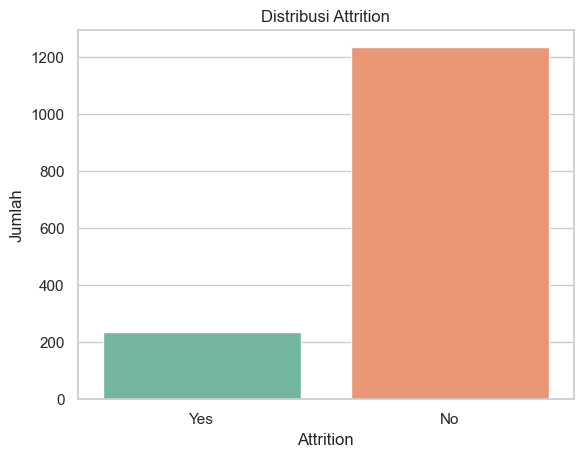


 Presentase Attrition :
Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64 %


In [ ]:
# Cek distribusi kolom target (y) disini y nya kolom Attrition
plt.Figure(figsize=(5, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Distribusi Attrition")
plt.ylabel("Jumlah")
plt.show()

att_rate = df['Attrition'].value_counts(normalize=True) * 100
att_rate = att_rate.round(2)
print("\n Presentase Attrition :")
print(att_rate)

C:\Users\Mugis\AppData\Local\Temp\ipykernel_14784\355231229.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1], palette='pastel')
C:\Users\Mugis\AppData\Local\Temp\ipykernel_14784\355231229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MaritalStatus', data=df, ax=axes[2], palette='pastel')


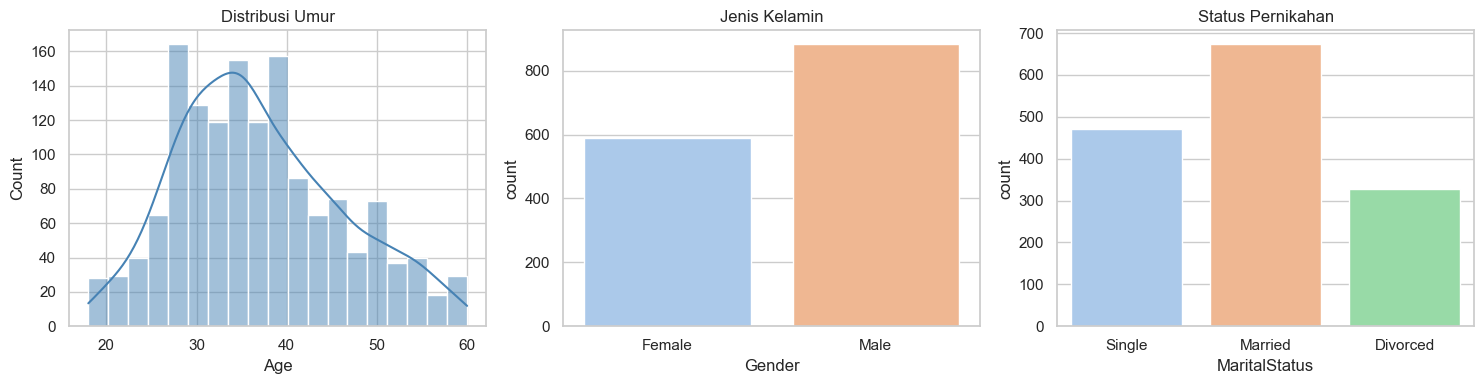

In [20]:
# analisis demografi

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], kde=True, ax=axes[0], color='steelblue')
sns.countplot(x='Gender', data=df, ax=axes[1], palette='pastel')
sns.countplot(x='MaritalStatus', data=df, ax=axes[2], palette='pastel')
axes[0].set_title('Distribusi Umur')
axes[1].set_title('Jenis Kelamin')
axes[2].set_title('Status Pernikahan')
plt.tight_layout()
plt.show()

## Umur pegawai berada pada rentang 30-40 tahun, pegawai di dominasi oleh laki-laki

C:\Users\Mugis\AppData\Local\Temp\ipykernel_14784\2324511732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='Age', data=df, palette='Set3')


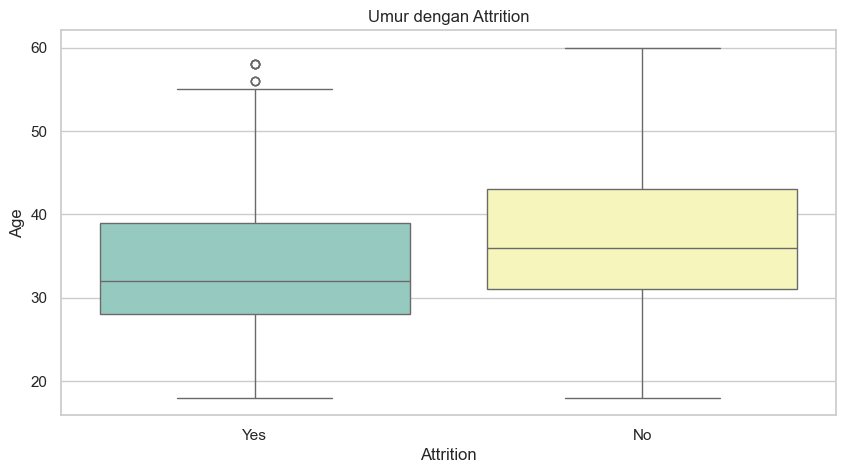

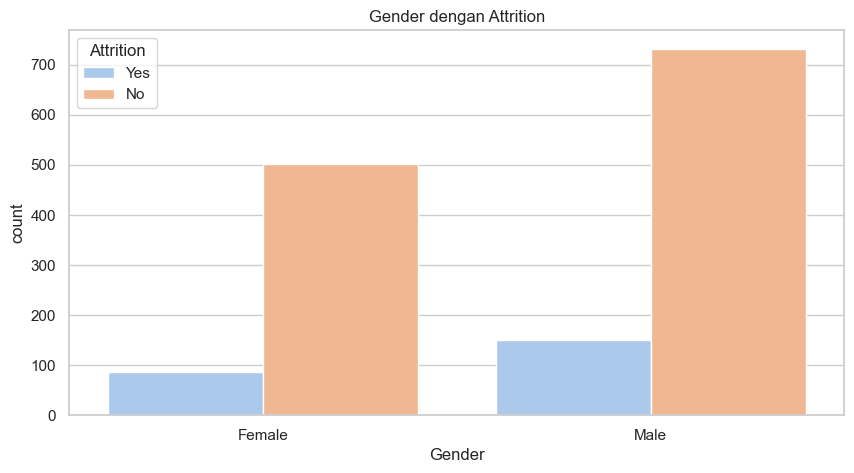

In [25]:
# korelasi demografi dengan attrition
plt.figure(figsize=(10, 5))
sns.boxplot(x='Attrition', y='Age', data=df, palette='Set3')
plt.title("Umur dengan Attrition")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='pastel')
plt.title('Gender dengan Attrition')
plt.show()

## insigh dari plot
### 1. 
Median umur karyawan yang resign sekitar 31 tahun (Attrition = Yes)  
Rentang umur karyawan yang resign banyak berada pada rentang 28-38 tahun, terdapat juga pegawai dengan umur > 50 th yang resign

### 2. 


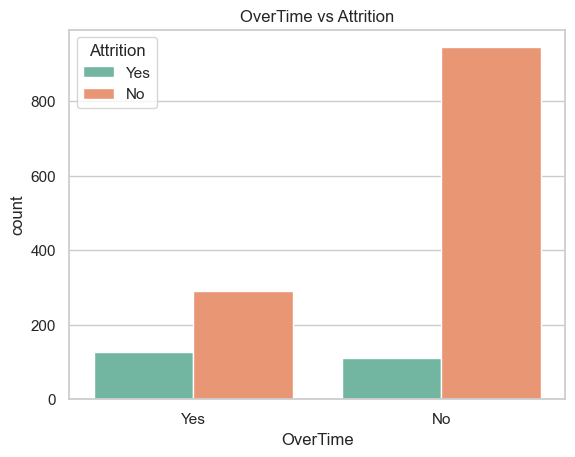

C:\Users\Mugis\AppData\Local\Temp\ipykernel_14784\1288034868.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')


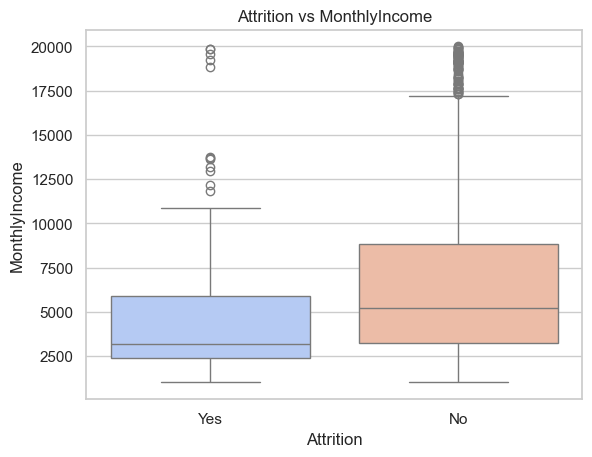

In [32]:
# Analis Faktor kerja
plt.Figure(figsize=(10, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set2')
plt.title("OverTime vs Attrition")
plt.show()

plt.Figure(figsize=(10, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title("Attrition vs MonthlyIncome")
plt.show()

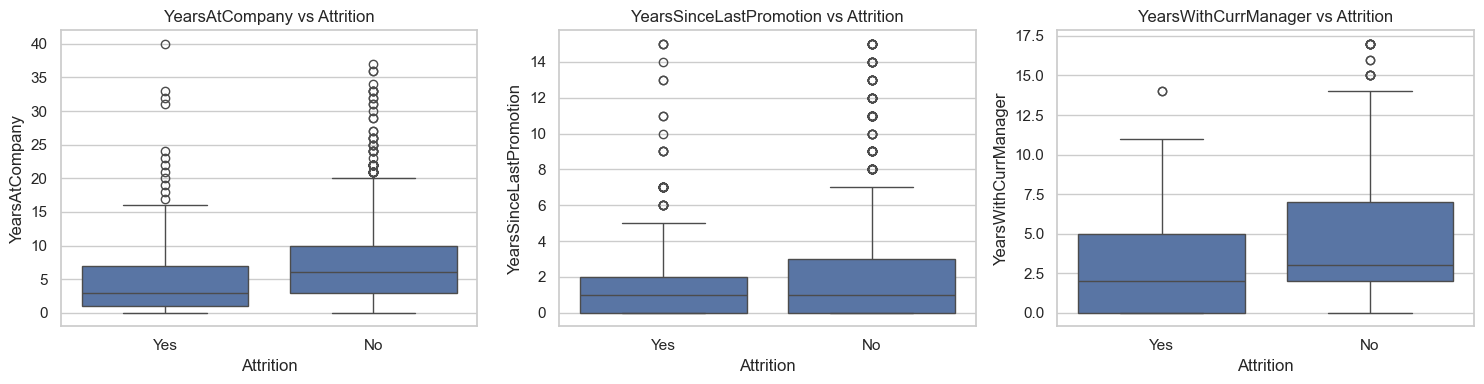

In [33]:
# Lama Bekerja dan Promosi

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axes[0])
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, ax=axes[1])
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, ax=axes[2])
axes[0].set_title("YearsAtCompany vs Attrition")
axes[1].set_title("YearsSinceLastPromotion vs Attrition")
axes[2].set_title("YearsWithCurrManager vs Attrition")
plt.tight_layout()
plt.show()